<a href="https://colab.research.google.com/github/TerriblePepito/skills-introduction-to-github/blob/main/Performancedraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pd



SyntaxError: invalid syntax (<ipython-input-8-9ae8202a74ac>, line 1)

In [ ]:
from google.colab import files
import pandas as pd

# Ouvrir la boîte de dialogue pour télécharger le fichier
uploaded = files.upload()

# Lire le fichier CSV téléchargé dans un DataFrame
for filename in uploaded.keys():
    df = pd.read_csv('trad20253.csv',delimiter=';', on_bad_lines='warn',encoding='latin-1')  # Importer le fichier CSV
    print(df.head())  # Afficher les premières lignes du DataFrame


Saving trad20253.csv to trad20253.csv
         date montant_invesit         performance         Cash  \
0  2025-01-01            9715  -4.87613825516499%     14755.2    
1  2025-01-03            9840   1.28667009778693%   14 739,00    
2  2025-01-06           10030   1.93089430894309%    14777.86    
3  2025-01-07           10087  0.568295114656037%    14837.27    
4  2025-01-08        10757.33   6.64548428670566%    14851.97    

  augmentation_du_cash cout_du_roll  
0    55.2000000000007           NaN  
1   -16.2000000000007           NaN  
2    38.8600000000006           NaN  
3    59.4099999999999       juil.21  
4    14.6999999999989        déc.66  


In [ ]:
df['montant_invesit'] = df['montant_invesit'].astype(str)
df['montant_invesit'] = df['montant_invesit'].str.replace(' ', '').str.replace(',', '.').astype(float)
df['performance'] = df['performance'].astype(str)
df['performance'] = df['performance'].str.replace(' ', '').str.replace(',', '.').str.rstrip('%').astype(float) # Remove '%' before converting to float
df['Cash'] = df['Cash'].astype(str)
df['Cash'] = df['Cash'].str.replace(' ', '').str.replace(',', '.').astype(float)
df['augmentation_du_cash'] = df['augmentation_du_cash'].astype(str)
df['augmentation_du_cash'] = df['augmentation_du_cash'].str.replace(' ', '').str.replace(',', '.').astype(float)

In [ ]:
print(df.dtypes)

date                     object
montant_invesit         float64
performance             float64
Cash                    float64
augmentation_du_cash    float64
cout_du_roll             object
perf_cum                 object
dtype: object


In [ ]:
print(df.head())

         date  montant_invesit  performance      Cash  augmentation_du_cash  \
0  2025-01-01          9715.00    -4.876138  14755.20                 55.20   
1  2025-01-03          9840.00     1.286670  14739.00                -16.20   
2  2025-01-06         10030.00     1.930894  14777.86                 38.86   
3  2025-01-07         10087.00     0.568295  14837.27                 59.41   
4  2025-01-08         10757.33     6.645484  14851.97                 14.70   

  cout_du_roll                                           perf_cum  
0          NaN                                 -4.87613825516499%  
1          NaN                -4.87613825516499%1.28667009778693%  
2          NaN  -4.87613825516499%1.28667009778693%1.930894308...  
3      juil.21  -4.87613825516499%1.28667009778693%1.930894308...  
4       déc.66  -4.87613825516499%1.28667009778693%1.930894308...  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


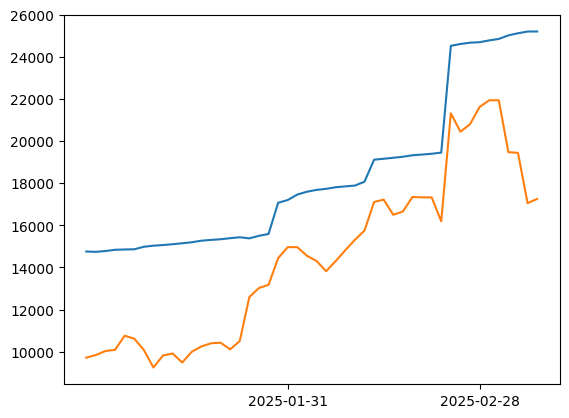

In [ ]:
plt.plot(df['date'], df['Cash'])
plt.plot(df['date'], df['montant_invesit'])
plt.xticks (['2025-01-31','2025-02-28'])
plt.show()

In [ ]:
gains_totaux=df['montant_invesit'].sum()
Moyenne_gains=df['montant_invesit'].mean()
variance_gains=df['montant_invesit'].var()
ecart_type_gains=df['montant_invesit'].std()
print(gains_totaux)
print(Moyenne_gains)
print(variance_gains)
print(ecart_type_gains)

694231.04
14463.146666666667
15786159.840350354
3973.180066439269


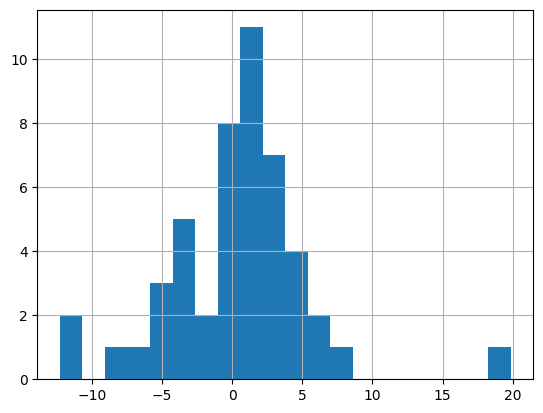

In [ ]:
df['performance'].hist(bins=20)
plt.show()

In [ ]:
print(df['performance'].mean())
print(df['performance'].std())
print(df['performance'].var())

0.4502612895216187
5.129593628497018
26.3127307935172


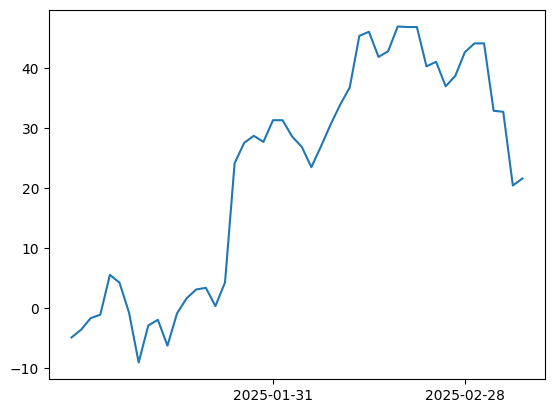

In [ ]:
df['perf_cum']=df['performance'].cumsum()
plt.plot(df['date'],df['perf_cum'])
plt.xticks (['2025-01-31','2025-02-28'])
plt.show()




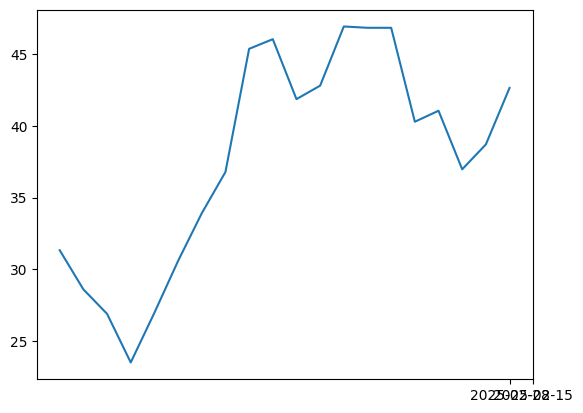

In [ ]:
#inférieur à mars
inf_mar = df[df['date'] < '2025-03-01']
#sup à janvier
DF_fev= inf_mar[inf_mar['date'] > '2025-01-31']
plt.plot(DF_fev['date'],DF_fev['perf_cum'])
plt.xticks (['2025-02-15','2025-02-28'])
plt.show()